In [2]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
import numpy as np
import torch.nn.functional as F

In [3]:
!unrar e '/content/drive/MyDrive/Doodle dataset.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Doodle dataset.rar

Extracting  full_numpy_bitmap_airplane.npy                                 0%  1%  2%  3%  4%  5%  OK 
Extracting  full_numpy_bitmap_ant.npy                                      5%  6%  7%  8%  9%  OK 
Extracting  full_numpy_bitmap_banana.npy                                   9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19%  OK 
Extracting  full_numpy_bitmap_baseball.npy                                19% 20% 21% 22% 23% 24% 25%  OK 
Extracting  full_numpy_bitmap_bird.npy                                    25% 26% 27% 28% 29% 30%  OK 
Extracting  full_numpy_bitmap_bucket.npy                                  30% 31% 32% 33% 34%  OK 
Extracting  full_numpy_bitmap_butterfly.npy     

In [4]:
D1=np.load("/content/full_numpy_bitmap_airplane.npy")

l1=np.full((151623,1),0)
D2=np.load("/content/full_numpy_bitmap_ant.npy")

l2=np.full((124612,1),1)
D3=np.load("/content/full_numpy_bitmap_banana.npy")

l3=np.full((307936,1),2)
D4=np.load("/content/full_numpy_bitmap_baseball.npy")

l4=np.full((135375,1),3)
D5=np.load("/content/full_numpy_bitmap_bird.npy")

l5=np.full((133572,1),4)
D6=np.load("/content/full_numpy_bitmap_bucket.npy")

l6=np.full((124064,1),5)
D7=np.load("/content/full_numpy_bitmap_butterfly.npy")

l7=np.full((117999,1),6)
D8=np.load("/content/full_numpy_bitmap_cat.npy")

l8=np.full((123202,1),7)
D9=np.load("/content/full_numpy_bitmap_coffee cup.npy")

l9=np.full((183432,1),8)
D10=np.load("/content/full_numpy_bitmap_dolphin.npy")

l10=np.full((121613,1),9)
D11=np.load("/content/full_numpy_bitmap_donut.npy")

l11=np.full((140751,1),10)
D12=np.load("/content/full_numpy_bitmap_duck.npy")

l12=np.full((135480,1),11)
D13=np.load("/content/full_numpy_bitmap_fish.npy")

l13=np.full((134150,1),12)
D14=np.load("/content/full_numpy_bitmap_leaf.npy")

l14=np.full((125571,1),13)
D15=np.load("/content/full_numpy_bitmap_mountain.npy")

l15=np.full((128540,1),14)
D16=np.load("/content/full_numpy_bitmap_pencil.npy")
l16=np.full((122001,1),15)
D17=np.load("/content/full_numpy_bitmap_smiley face.npy")
l17=np.full((124386,1),16)
D18=np.load("/content/full_numpy_bitmap_snake.npy")
l18=np.full((122273,1),17)
D19=np.load("/content/full_numpy_bitmap_umbrella.npy")
l19=np.full((124084,1),18)
D20=np.load("/content/full_numpy_bitmap_wine bottle.npy")
l20=np.full((126373,1),19)



In [5]:
total_data=np.concatenate((D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20),axis=0)
total_label=np.concatenate((l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20),axis=0)
print(total_data.shape)
print(total_label.shape)
a=np.arange(0,2807037)
np.random.shuffle(a)
total_data=total_data[a,:]
total_label=total_label[a,:]

(2807037, 784)
(2807037, 1)


In [20]:
batch_size=1024
total_batches=549


class Data_train(Dataset):
  def __init__(self):
    self.x= total_data[:1964925,:].reshape(1964925,1,28,28)
    self.y= total_label[:1964925,:].reshape(1964925,)
    self.n= total_data[:1964925,:].shape[0]
  def __getitem__(self,i):
    return self.x[i],self.y[i]
  def __len__(self):
    return self.n
data_train=Data_train()
dataloader_train=DataLoader(data_train,batch_size=1024,shuffle=True)

class Data_test(Dataset):
  def __init__(self):
    self.x= total_data[1964925:,:].reshape(2807037-1964925,1,28,28)
    self.y= total_label[1964925:,:].reshape(2807037-1964925,)
    self.n= total_data[1964925:,:].shape[0]
  def __getitem__(self,i):
    return self.x[i],self.y[i]
  def __len__(self):
    return self.n
data_test=Data_test()
dataloader_test=DataLoader(data_test,batch_size=1024,shuffle=True)

In [23]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learning_rate=0.03

class ConvNN(nn.Module): 
  def __init__(self):
    super(ConvNN, self).__init__()
    self.conv1=nn.Conv2d(1,6,5)
    self.pool= nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*4*4,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,20)

    
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,16*4*4)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x
    


model= ConvNN().to(device)

criterion=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

train_losses = []
train_counter = []
test_losses = []
num_epochs=100
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(dataloader_train):
    images=images.to(device)
    labels=labels.to(device)
    #forward
    outputs=model(images.float())
    loss=criterion(outputs,labels)
    if i%4000 == 0:
      train_losses.append(loss.item())

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%4000 == 0:
      print(f'Epoch number: {epoch+1}, loss ={loss.item():.4f}')

Epoch number: 1, loss =6.8608
Epoch number: 2, loss =0.5302
Epoch number: 3, loss =0.4119
Epoch number: 4, loss =0.4148
Epoch number: 5, loss =0.3767
Epoch number: 6, loss =0.3707
Epoch number: 7, loss =0.4604
Epoch number: 8, loss =0.3800
Epoch number: 9, loss =0.3989
Epoch number: 10, loss =0.4028
Epoch number: 11, loss =0.3887
Epoch number: 12, loss =0.4070
Epoch number: 13, loss =0.3860
Epoch number: 14, loss =0.3574
Epoch number: 15, loss =0.3560
Epoch number: 16, loss =0.3676
Epoch number: 17, loss =0.3174
Epoch number: 18, loss =0.3206
Epoch number: 19, loss =0.3405
Epoch number: 20, loss =0.3884
Epoch number: 21, loss =0.3907
Epoch number: 22, loss =0.3070
Epoch number: 23, loss =0.3527
Epoch number: 24, loss =0.3437
Epoch number: 25, loss =0.3182
Epoch number: 26, loss =0.3195
Epoch number: 27, loss =0.3195
Epoch number: 28, loss =0.3400
Epoch number: 29, loss =0.3016
Epoch number: 30, loss =0.3618
Epoch number: 31, loss =0.3229
Epoch number: 32, loss =0.3128
Epoch number: 33,

In [24]:
def test(): 
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in (dataloader_test):
      images=images.to(device)
      labels=labels.to(device)
      outputs = model(images.float())

      _,predictions = torch.max(outputs, 1) #torch.max function will return the value and the index and we are interested in the actual index
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()
  
    acc = 100* n_correct / n_samples
    print(f'Test accuracy = {acc:.4f}')

def train(): 
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in (dataloader_train):
      images=images.to(device)
      labels=labels.to(device)
      outputs = model(images.float())

      _,predictions = torch.max(outputs, 1) #torch.max function will return the value and the index and we are interested in the actual index
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()
  
    acc = 100* n_correct / n_samples
    print(f'Training accuracy = {acc:.4f}')

train()
test()

Training accuracy = 91.1178
Test accuracy = 90.3160


Text(0.5, 1.0, 'Learning rate 0.03')

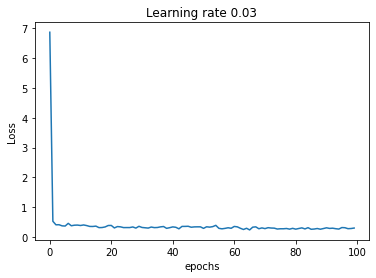

In [29]:
plt.plot(train_losses)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Learning rate 0.03")

In [28]:
FILE = 'doodle.pth'
torch.save(model.state_dict(), FILE)